## Imports

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import utils
import folium

#reload 
import importlib
importlib.reload(utils)


<module 'utils' from 'c:\\Users\\UFMG\\Periodos\\Periodo_XIV\\TCC\\Projeto\\Códigos\\tcc_ovitraps\\utils.py'>

In [38]:
# Load the data
data = pd.read_csv('./data/final_data.csv')

In [39]:
data_no0 = data[data['novos'] > 0]
data_2_1000  = data[(data['novos'] > 2) & (data['novos'] <= 1000)]
data_1_100  = data[(data['novos'] > 0) & (data['novos'] <= 100)]
data_101_1000  = data[(data['novos'] > 100) & (data['novos'] <= 1000)]
data_1001_inf  = data[(data['novos'] > 1000)]


## Relevant information

### Number of samples

In [40]:
data.shape[0]
print('Total number of samples: ', data.shape[0])

Total number of samples:  517799


### General eggs information

In [41]:
data['novos'].describe()

count    517799.000000
mean         36.076566
std          74.214830
min           0.000000
25%           0.000000
50%           0.000000
75%          45.000000
max        4227.000000
Name: novos, dtype: float64

### Percentage of zero 

In [42]:
percentage = (data['novos'] == 0).sum()/len(data['novos'])*100
print(f'Percentage of 0 values: {percentage:.2f}%')

Percentage of 0 values: 52.01%


### Number of traps

In [43]:
ntraps = data['narmad'].unique().shape[0]
print(f'Number of traps: {ntraps}')

Number of traps: 2008


### Number of plates

In [44]:
nplates = data['nplaca'].unique().shape[0]
print(f'Number of plates: {nplates}')

Number of plates: 517799


### Traps by year

,anoepid,count
12,2011_12,13889
11,2012_13,38166
10,2013_14,39457
9,2014_15,40120
4,2015_16,42047
8,2016_17,40713
6,2017_18,40935
5,2018_19,41486
7,2019_20,40850
3,2020_21,42152


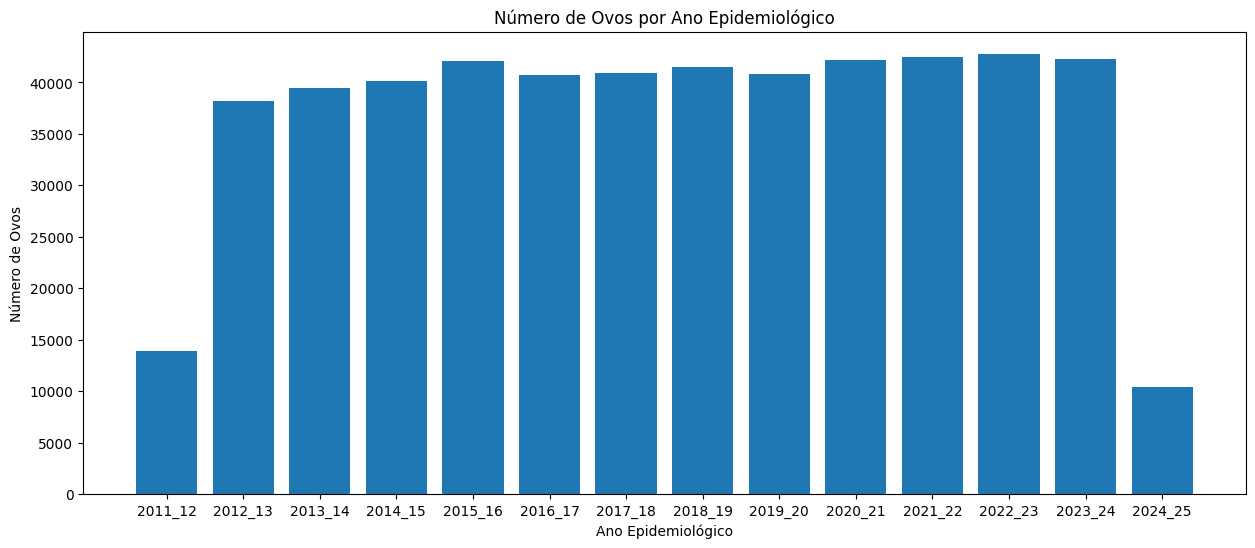

In [45]:
trap_by_year = data['anoepid'].value_counts().reset_index().sort_values('anoepid')
display(trap_by_year)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_year['anoepid'], trap_by_year['count'])
plt.xlabel('Ano Epidemiológico')
plt.ylabel('Número de Ovos')
plt.title('Número de Ovos por Ano Epidemiológico')
plt.show()

### Traps by category

,GerCat,count,min,max,mean
3,A1,26758,0.0,2417.0,95.937813
0,A2,315305,0.0,4227.0,42.481055
2,B,70881,0.0,2054.0,8.977145
1,M,104855,0.0,1278.0,19.860836


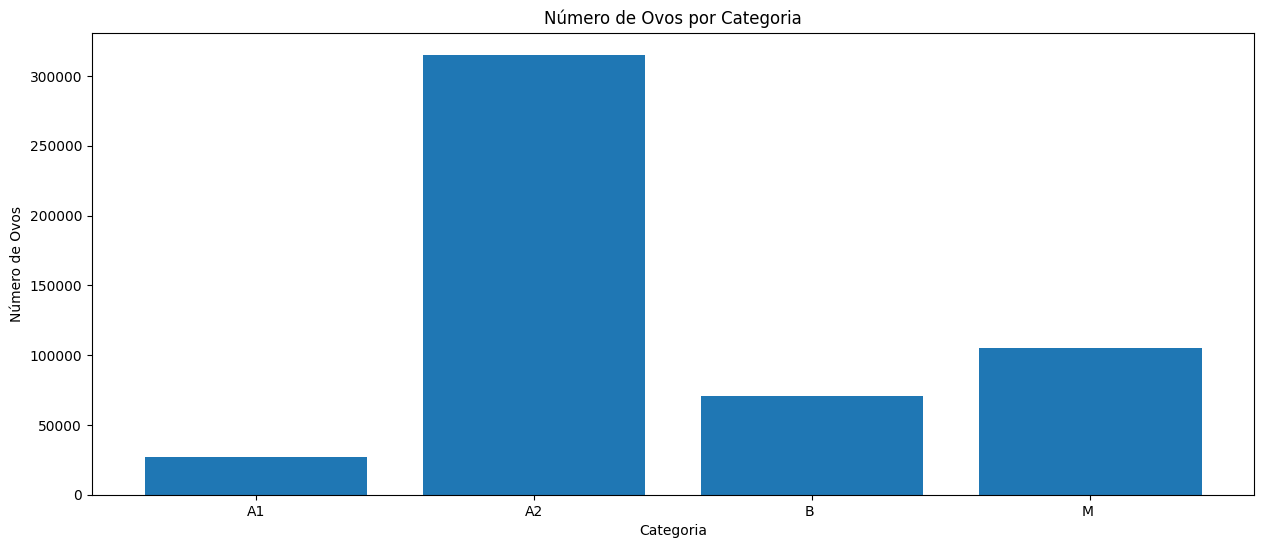

In [46]:
trap_by_cat = data['GerCat'].value_counts().reset_index().sort_values('GerCat')
trap_by_cat['min']  = [min(data[data['GerCat']==cat]['novos']) for cat in trap_by_cat['GerCat']] 
trap_by_cat['max']   = [max(data[data['GerCat']==cat]['novos']) for cat in trap_by_cat['GerCat']]
trap_by_cat['mean']  = [data[data['GerCat']==cat]['novos'].mean() for cat in trap_by_cat['GerCat']]



display(trap_by_cat)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_cat['GerCat'], trap_by_cat['count'])
plt.xlabel('Categoria')
plt.ylabel('Número de Ovos')
plt.title('Número de Ovos por Categoria')
plt.show()

### Traps by region

,distrito,count
2,BARREIRO,63077
3,CENTRO-SUL,61829
7,LESTE,50862
4,NORDESTE,59096
1,NOROESTE,64465
8,NORTE,40117
6,OESTE,51752
0,PAMPULHA,74233
5,VENDA NOVA,52368


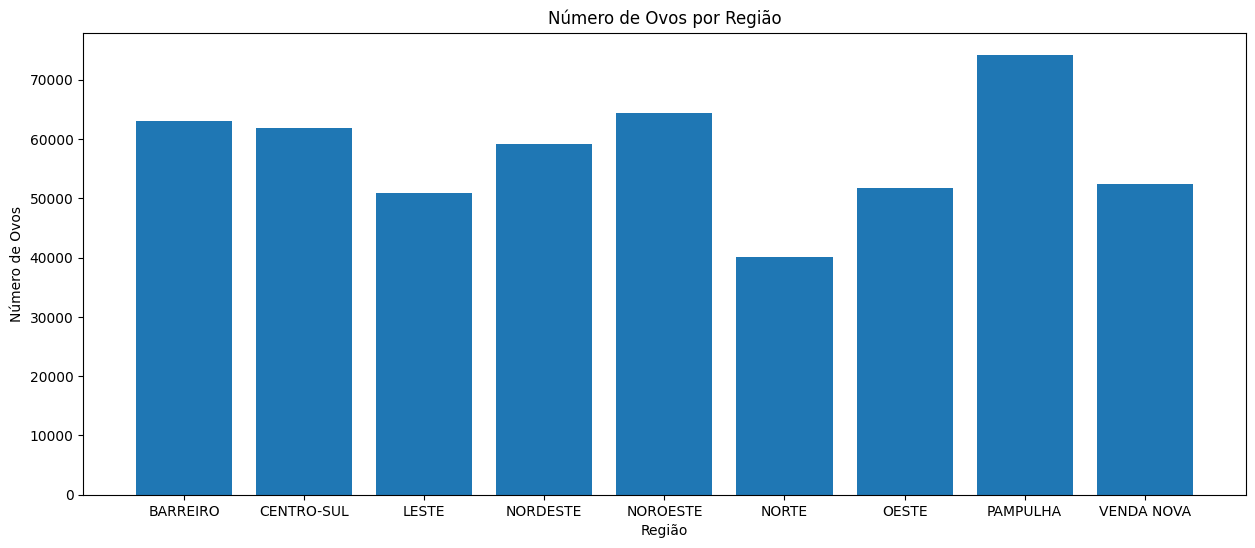

In [47]:
trap_by_reg = data['distrito'].value_counts().reset_index().sort_values('distrito')


display(trap_by_reg)

plt.figure(figsize=(15, 6))
plt.bar(trap_by_reg['distrito'], trap_by_reg['count'])
plt.xlabel('Região')
plt.ylabel('Número de Ovos')
plt.title('Número de Ovos por Região')
plt.show()

## Histograms

### All data

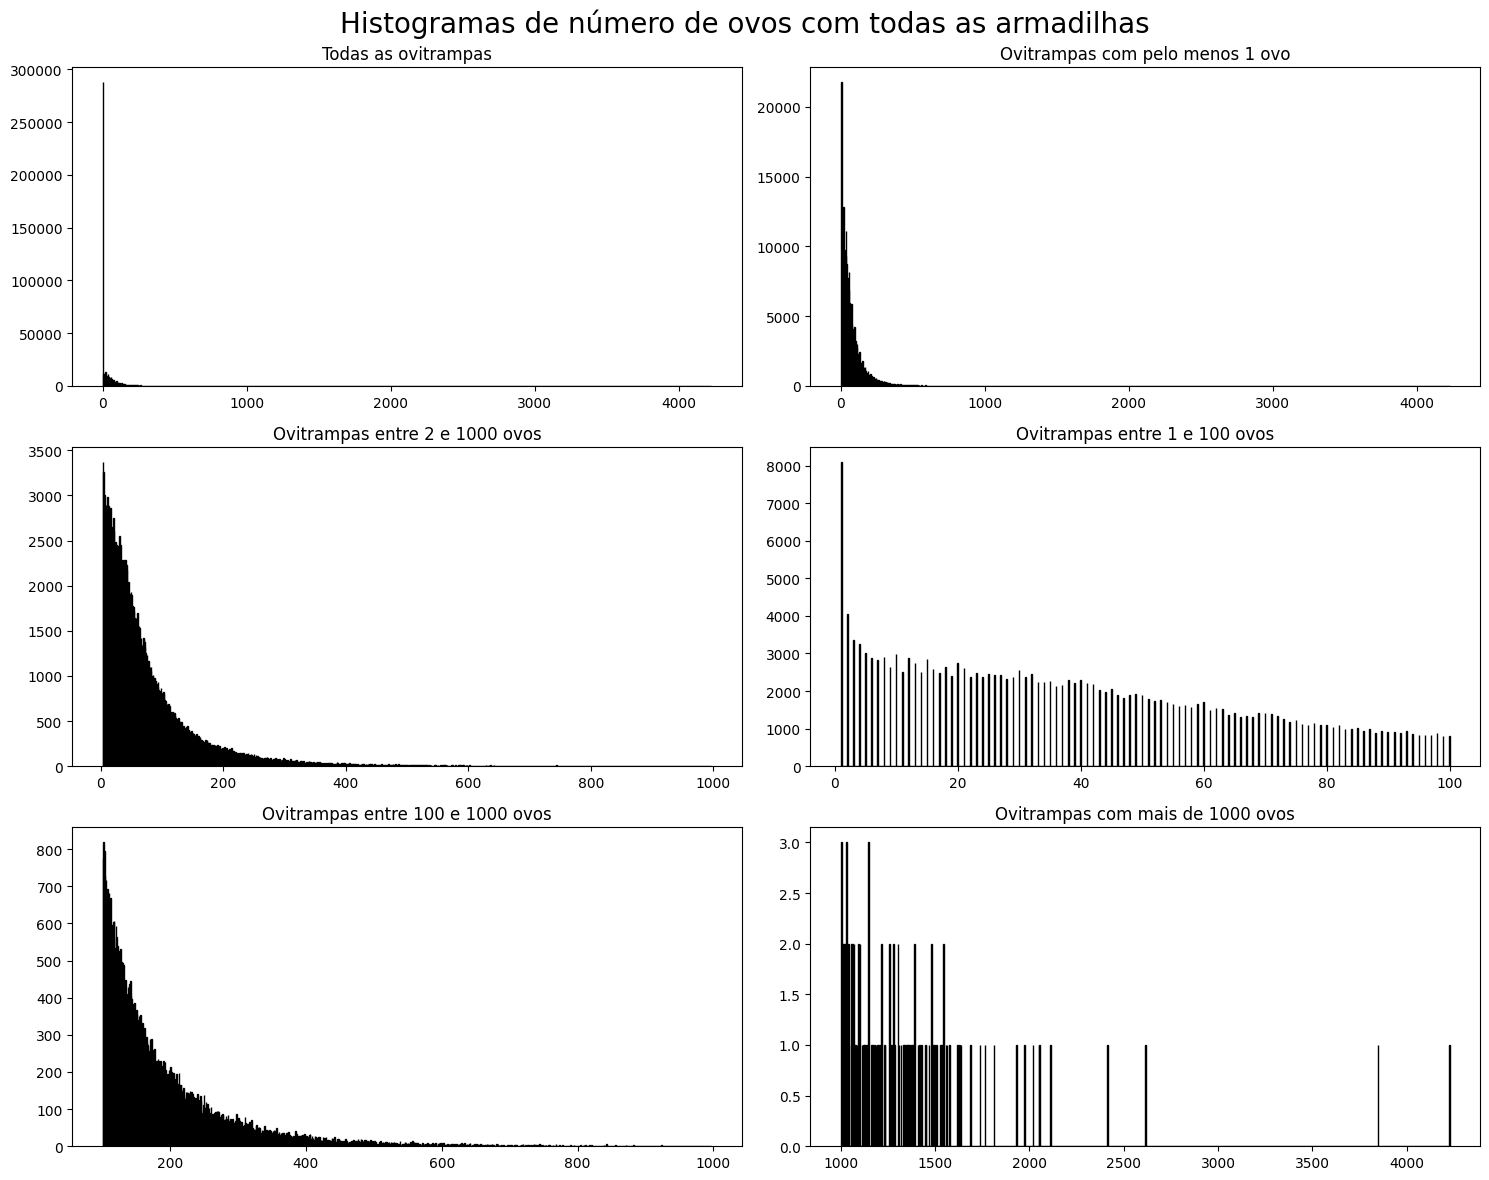

In [51]:
fig,axs = plt.subplots(nrows = 3, ncols = 2,figsize=(15, 12))    
plt.suptitle('Histogramas de número de ovos com todas as armadilhas', fontsize=20)

axs[0,0].hist(data['novos'], bins=1000, color='blue', edgecolor='black')
axs[0,0].set_title('Todas as ovitrampas')

axs[0,1].hist(data_no0['novos'], bins=1000, color='blue', edgecolor='black')
axs[0,1].set_title('Ovitrampas com pelo menos 1 ovo')

axs[1,0].hist(data_2_1000['novos'], bins=1000, color='blue', edgecolor='black')
axs[1,0].set_title('Ovitrampas entre 2 e 1000 ovos')

axs[1,1].hist(data_1_100['novos'], bins=1000, color='blue', edgecolor='black')
axs[1,1].set_title('Ovitrampas entre 1 e 100 ovos')

axs[2,0].hist(data_101_1000['novos'], bins=1000, color='blue', edgecolor='black')
axs[2,0].set_title('Ovitrampas entre 100 e 1000 ovos')

axs[2,1].hist(data_1001_inf['novos'], bins=1000, color='blue', edgecolor='black')
axs[2,1].set_title('Ovitrampas com mais de 1000 ovos')


"""
plt.xlabel('Contagem de ovos')
plt.ylabel('Número de ovitrampas')
 """
plt.tight_layout()
plt.show()

### Annual

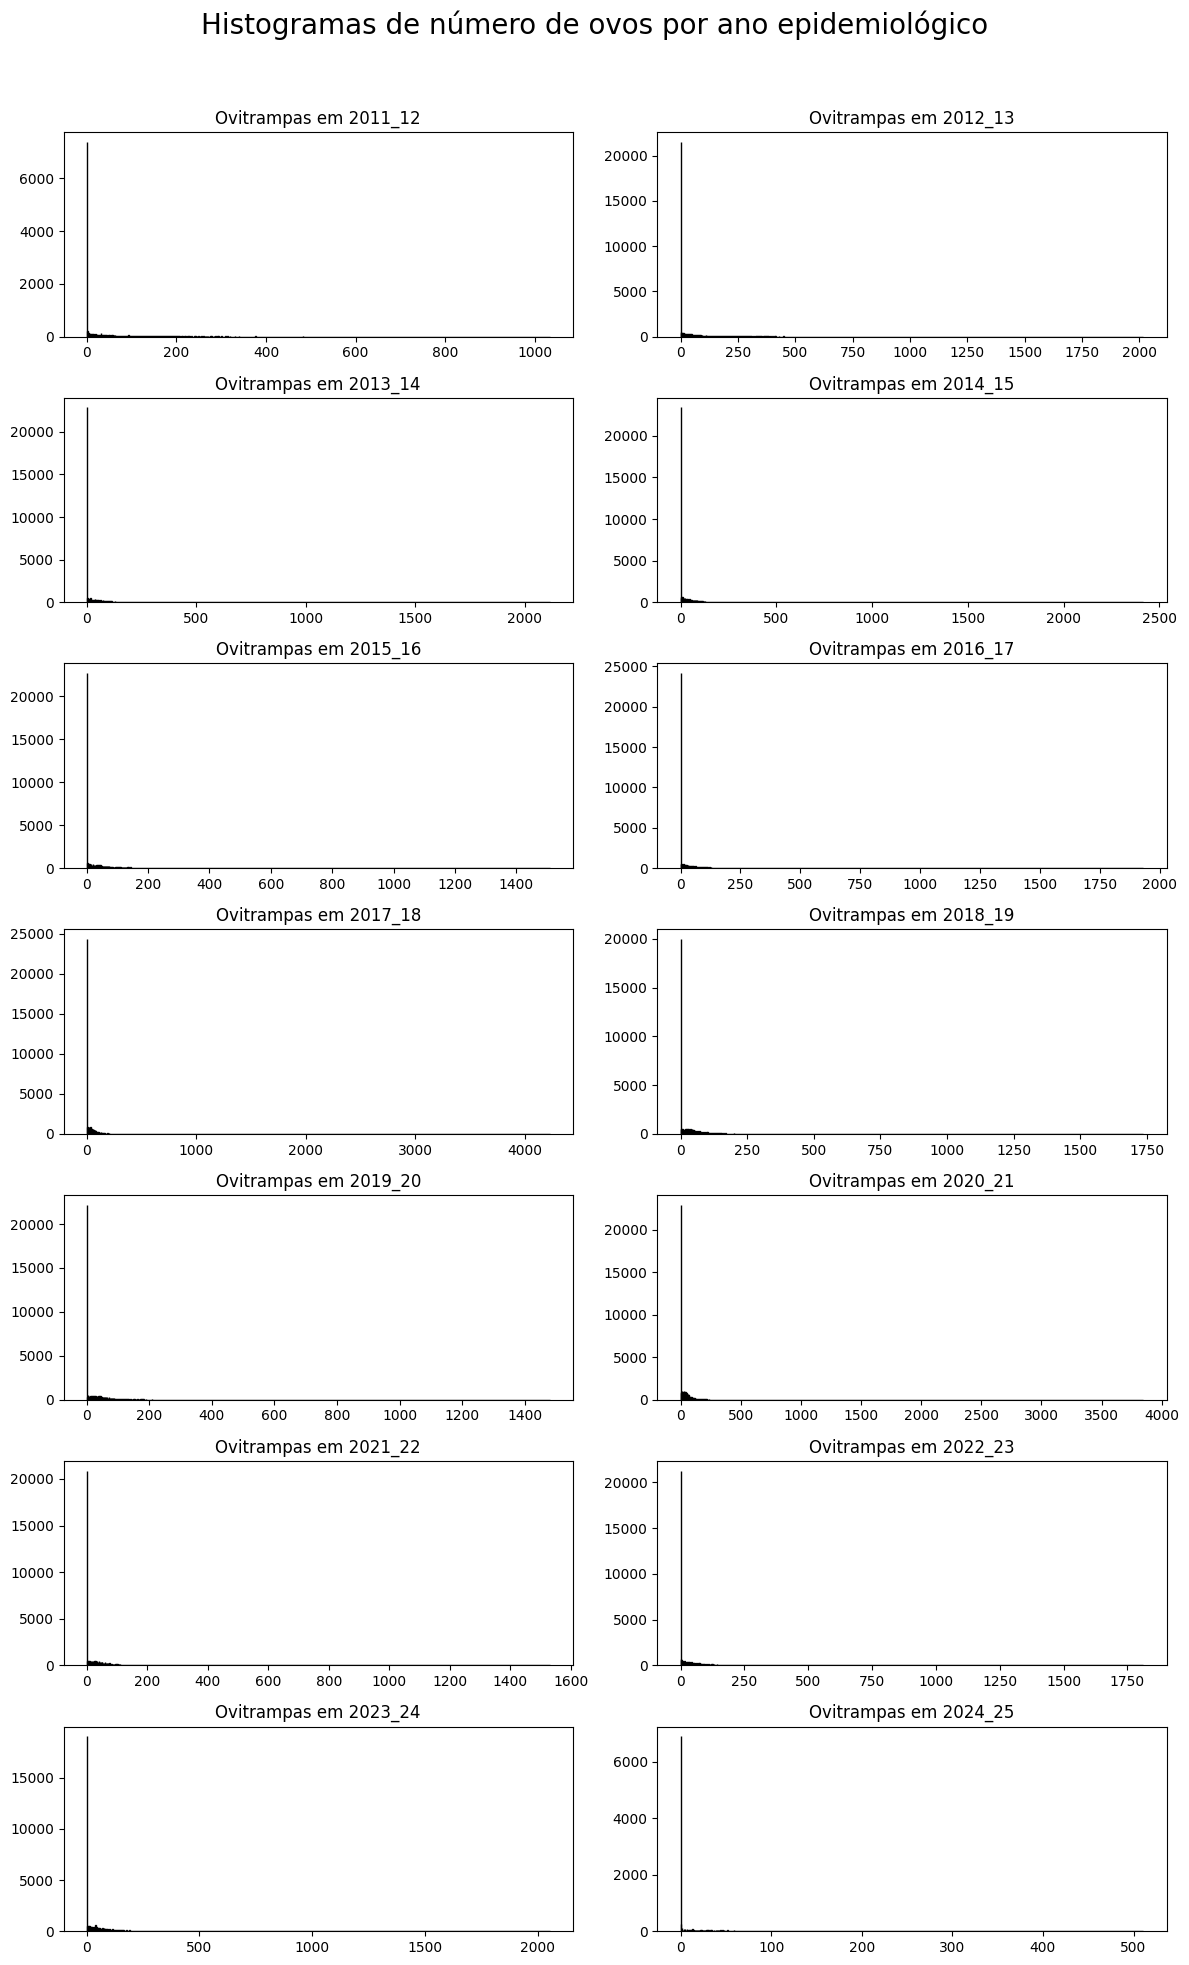

In [15]:
fig,axs = plt.subplots(nrows = 7, ncols = 2,figsize=(12, 20))    
plt.suptitle('Histogramas de número de ovos por ano epidemiológico', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_year['anoepid']:
    j = abs(j-1) # 0 or 1
    
    
    data_year = data[data['anoepid'] == i]
    axs[count,j].hist(data_year['novos'], bins=1000, color='blue', edgecolor='black')
    axs[count,j].set_title('Ovitrampas em ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

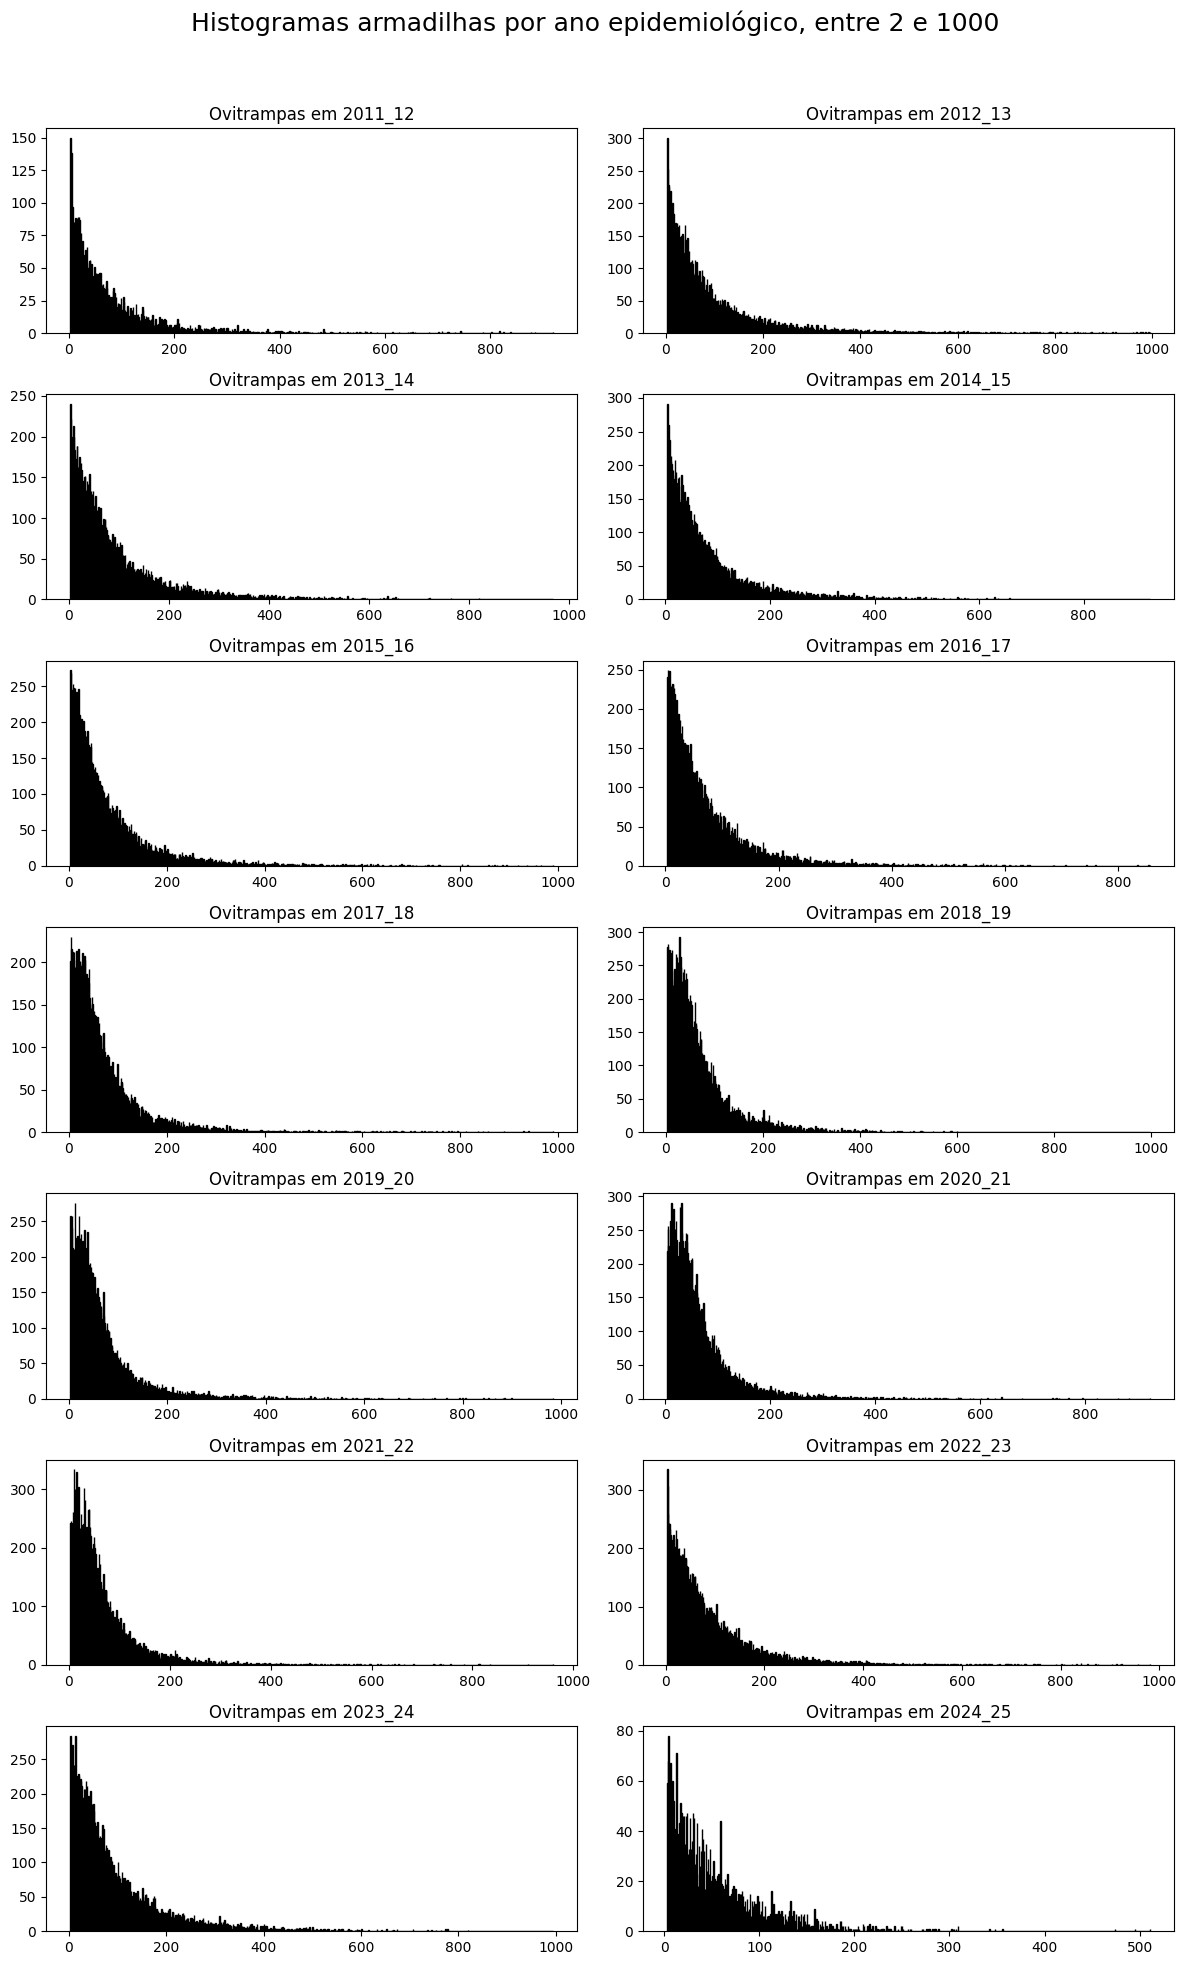

In [16]:
fig,axs = plt.subplots(nrows = 7, ncols = 2,figsize=(12, 20))    
plt.suptitle('Histogramas armadilhas por ano epidemiológico, entre 2 e 1000', fontsize=18)

j = 1 #plot index
count = 0
for i in trap_by_year['anoepid']:
    j = abs(j-1) # 0 or 1
    
    
    data_year = data_2_1000[data_2_1000['anoepid'] == i]
    axs[count,j].hist(data_year['novos'], bins=1000, color='blue', edgecolor='black')
    axs[count,j].set_title('Ovitrampas em ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Category

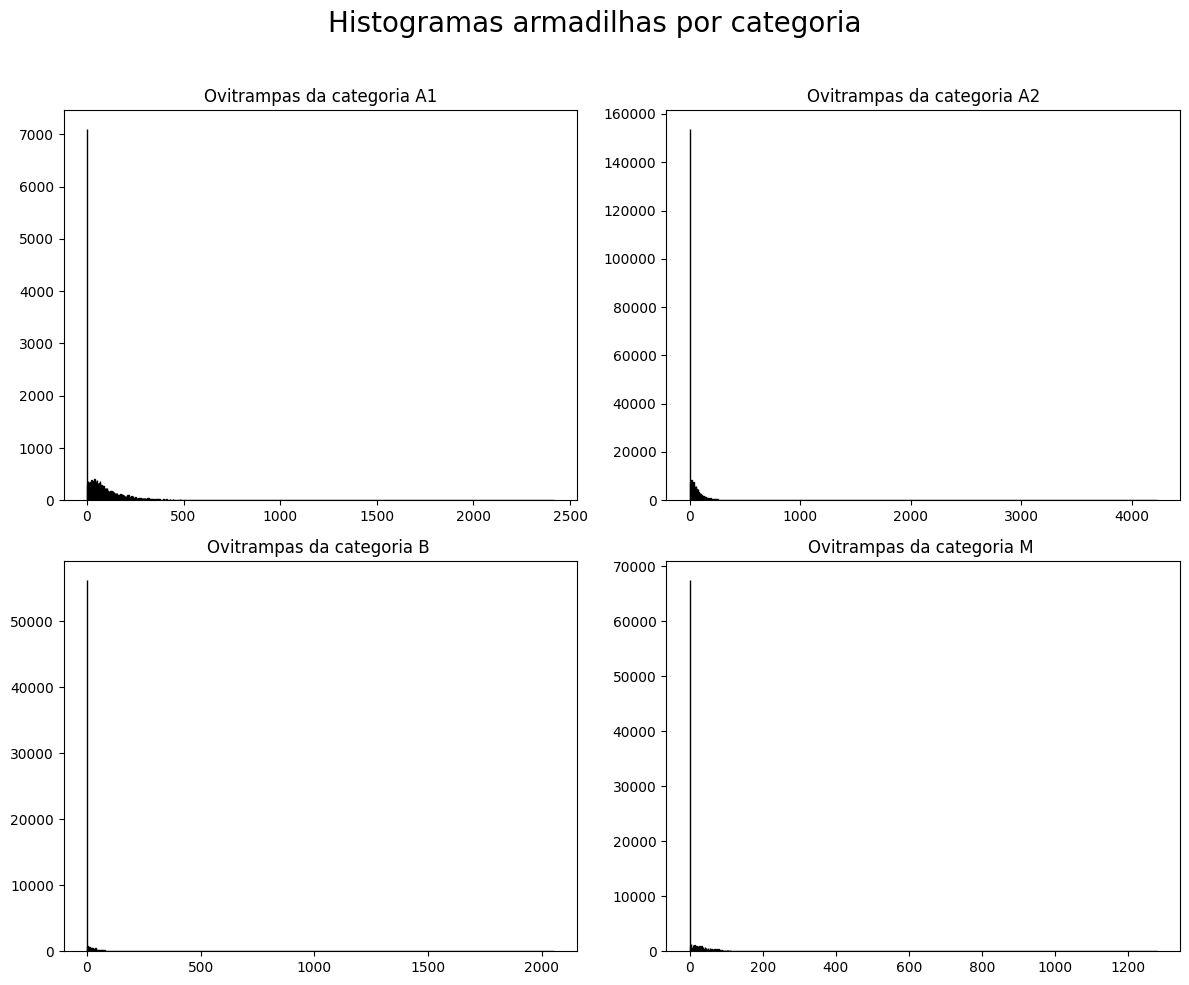

In [17]:
fig,axs = plt.subplots(nrows = 2, ncols = 2,figsize=(12, 10))    
plt.suptitle('Histogramas armadilhas por categoria', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_cat['GerCat']:
    j = abs(j-1) # 0 or 1
    
    
    data_cat = data[data['GerCat'] == i]
    axs[count,j].hist(data_cat['novos'], bins=1000, color='blue', edgecolor='black')
    axs[count,j].set_title('Ovitrampas da categoria ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

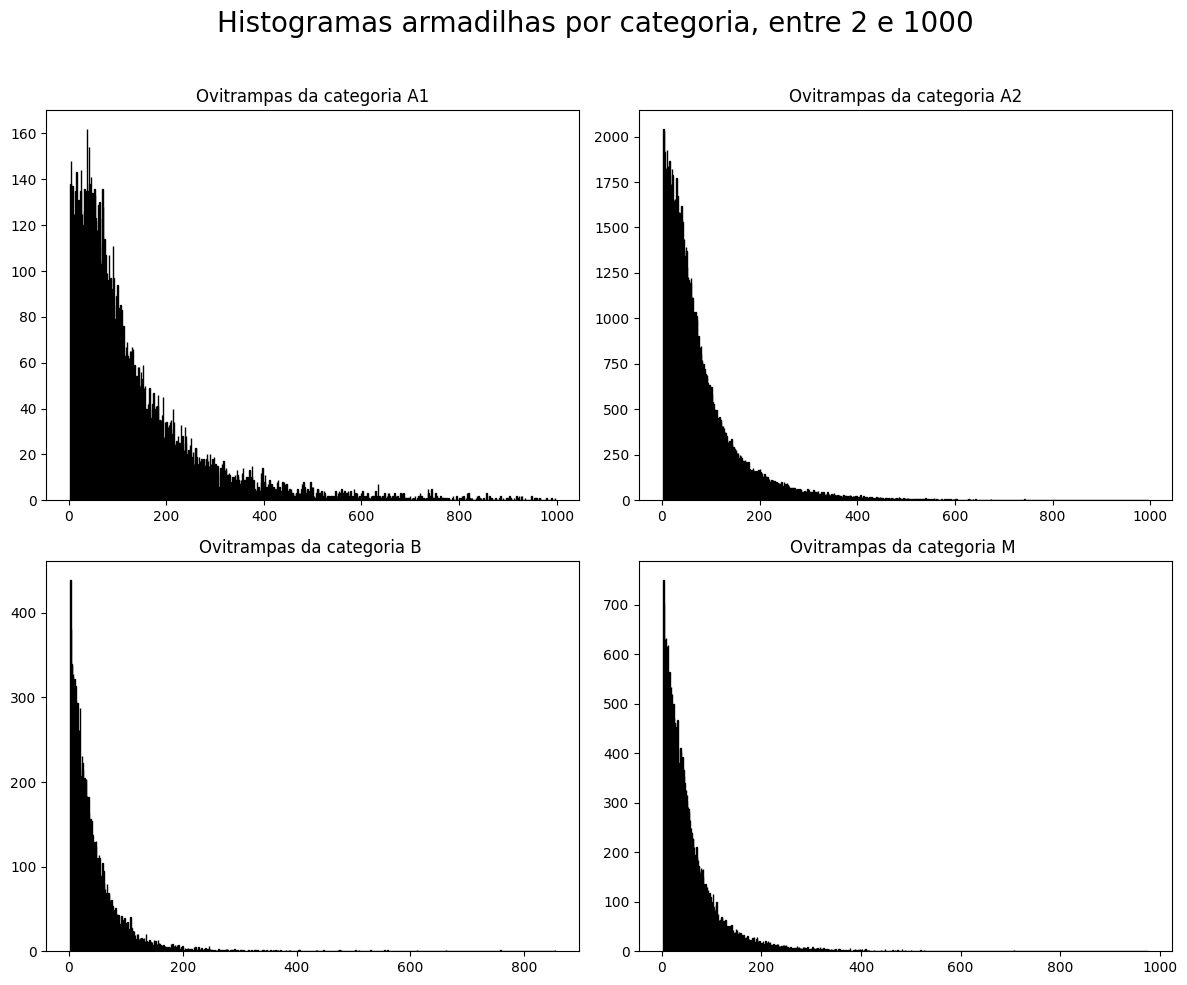

In [18]:
fig,axs = plt.subplots(nrows = 2, ncols = 2,figsize=(12, 10))    
plt.suptitle('Histogramas armadilhas por categoria, entre 2 e 1000', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_cat['GerCat']:
    j = abs(j-1) # 0 or 1
    
    
    data_cat = data_2_1000[data_2_1000['GerCat'] == i]
    axs[count,j].hist(data_cat['novos'], bins=1000, color='blue', edgecolor='black')
    axs[count,j].set_title('Ovitrampas da categoria ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Region

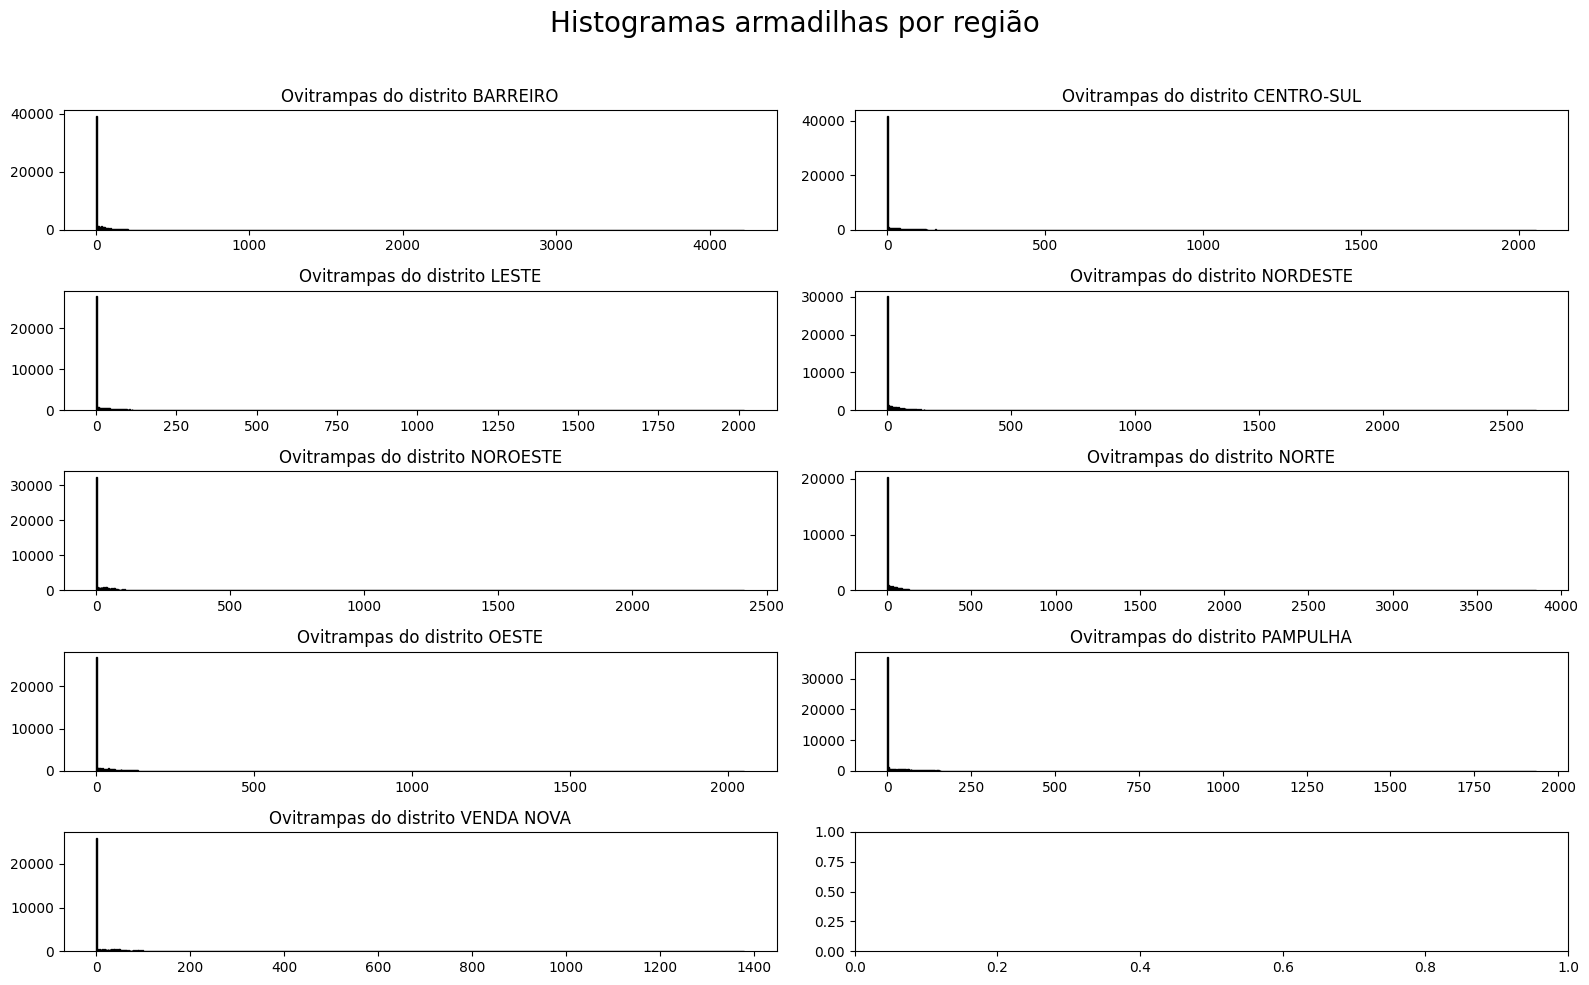

In [19]:
fig,axs = plt.subplots(nrows = 5, ncols = 2,figsize=(16, 10))    
plt.suptitle('Histogramas armadilhas por região', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_reg['distrito']:
    j = abs(j-1) # 0 or 1
    
    
    data_cat = data[data['distrito'] == i]
    axs[count,j].hist(data_cat['novos'], bins=1000, color='blue', edgecolor='black')
    axs[count,j].set_title('Ovitrampas do distrito ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20580\4232280562.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat = data_1_1000[data['distrito'] == i]
C:\Users\User\AppData\Local\Temp\ipykernel_20580\4232280562.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat = data_1_1000[data['distrito'] == i]
C:\Users\User\AppData\Local\Temp\ipykernel_20580\4232280562.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat = data_1_1000[data['distrito'] == i]
C:\Users\User\AppData\Local\Temp\ipykernel_20580\4232280562.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat = data_1_1000[data['distrito'] == i]
C:\Users\User\AppData\Local\Temp\ipykernel_20580\4232280562.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cat = data_1_1000[data['distrito'] == i]
C:\Users\User\AppData\Local\Temp\ipykernel_20

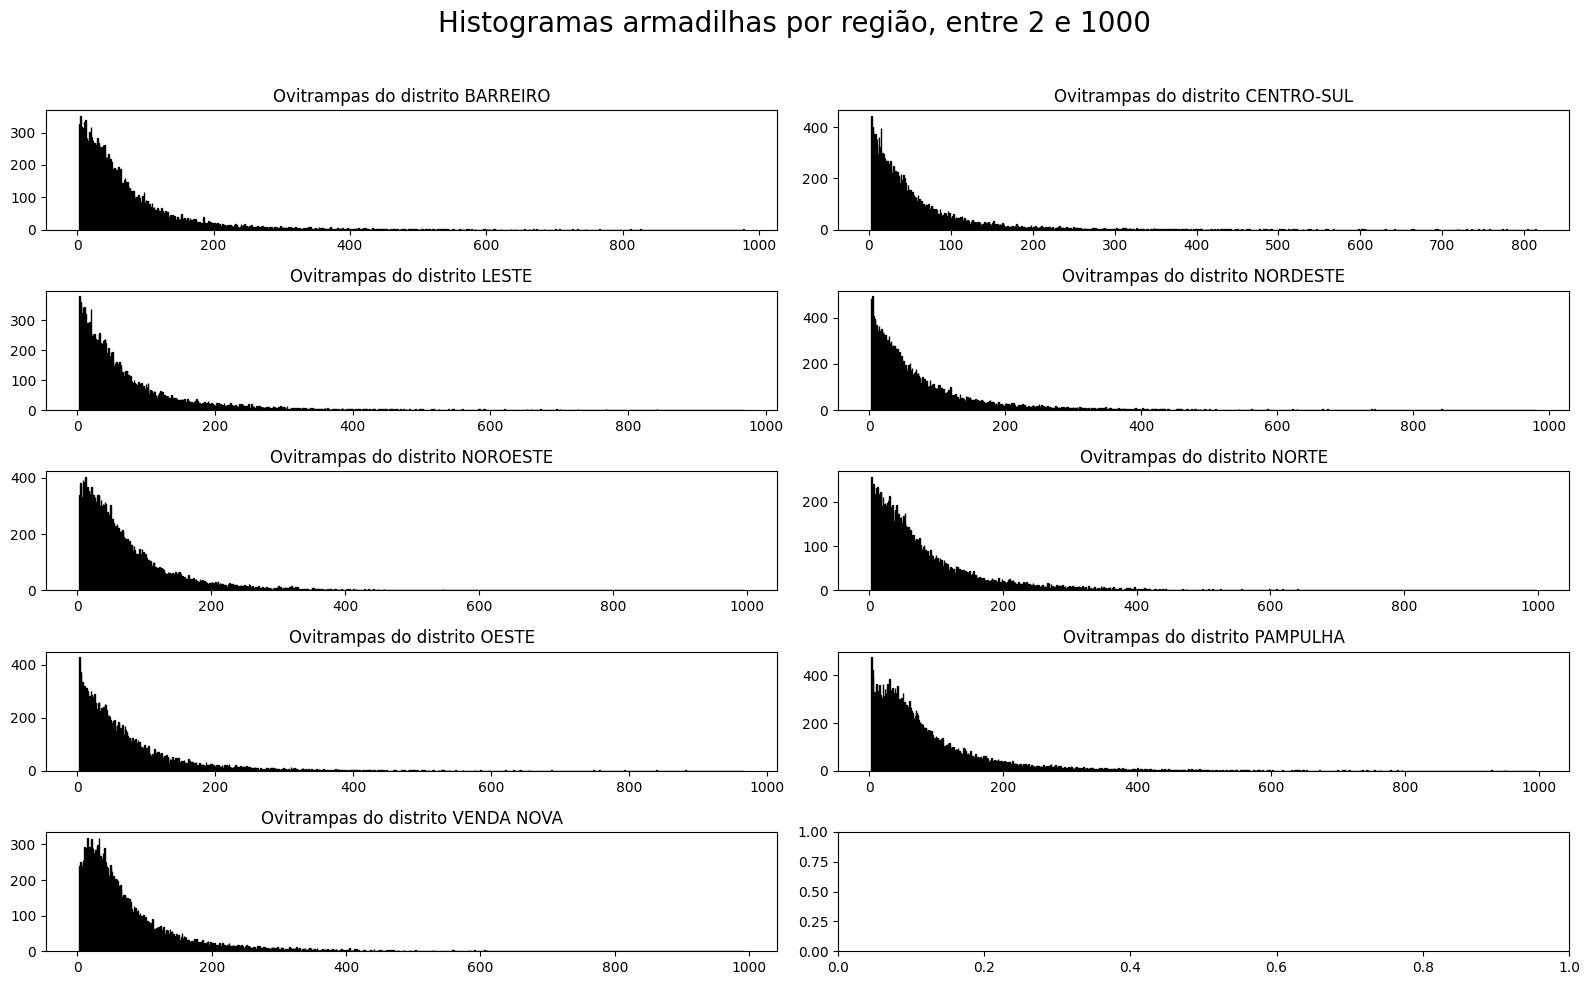

In [20]:
fig,axs = plt.subplots(nrows = 5, ncols = 2,figsize=(16, 10))    
plt.suptitle('Histogramas armadilhas por região, entre 2 e 1000', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_reg['distrito']:
    j = abs(j-1) # 0 or 1
    
    
    data_cat = data_2_1000[data['distrito'] == i]
    axs[count,j].hist(data_cat['novos'], bins=1000, color='blue', edgecolor='black')
    axs[count,j].set_title('Ovitrampas do distrito ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Pareto Plots

### Artificial Data

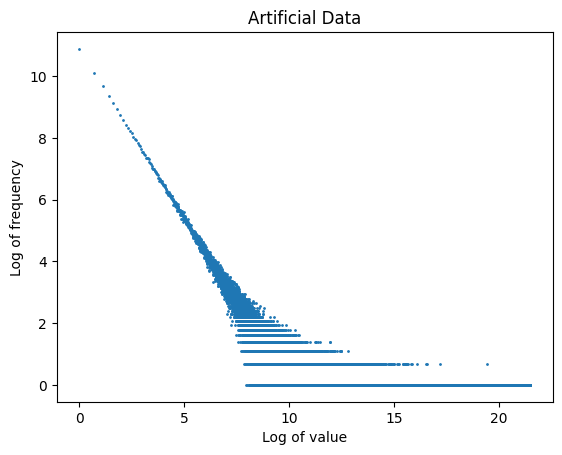

In [21]:
from scipy.stats import zipf
# Parameters for the Pareto distribution
alpha = 1.1 # Shape parameter
x_m = 1     # Minimum value
n = 500000    # Number of data points

# Generate Pareto-distributed data
pareto_data = zipf.rvs(alpha, size=n)
pareto_data = pd.Series(pareto_data,name="pareto")
utils.pareto_plot(pareto_data,"Artificial Data")


### All data

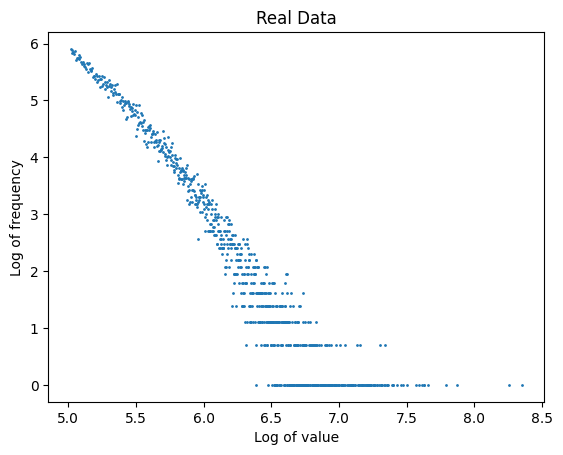

In [22]:
data_10_inf  = data[(data['novos'] > 150)]

utils.pareto_plot(data_10_inf['novos'],"Real Data")    

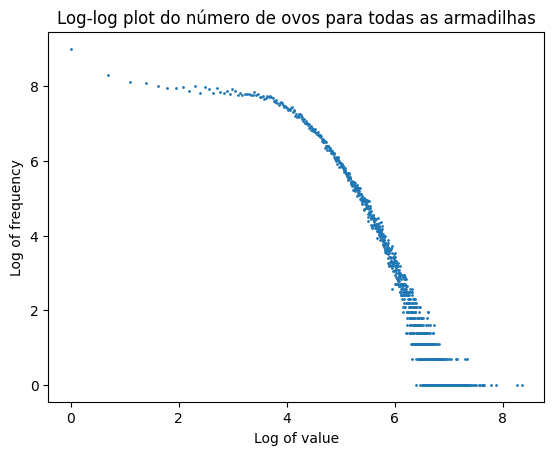

In [23]:
utils.pareto_plot(data['novos'],plt_title= "Log-log plot do número de ovos para todas as armadilhas")


### Annual


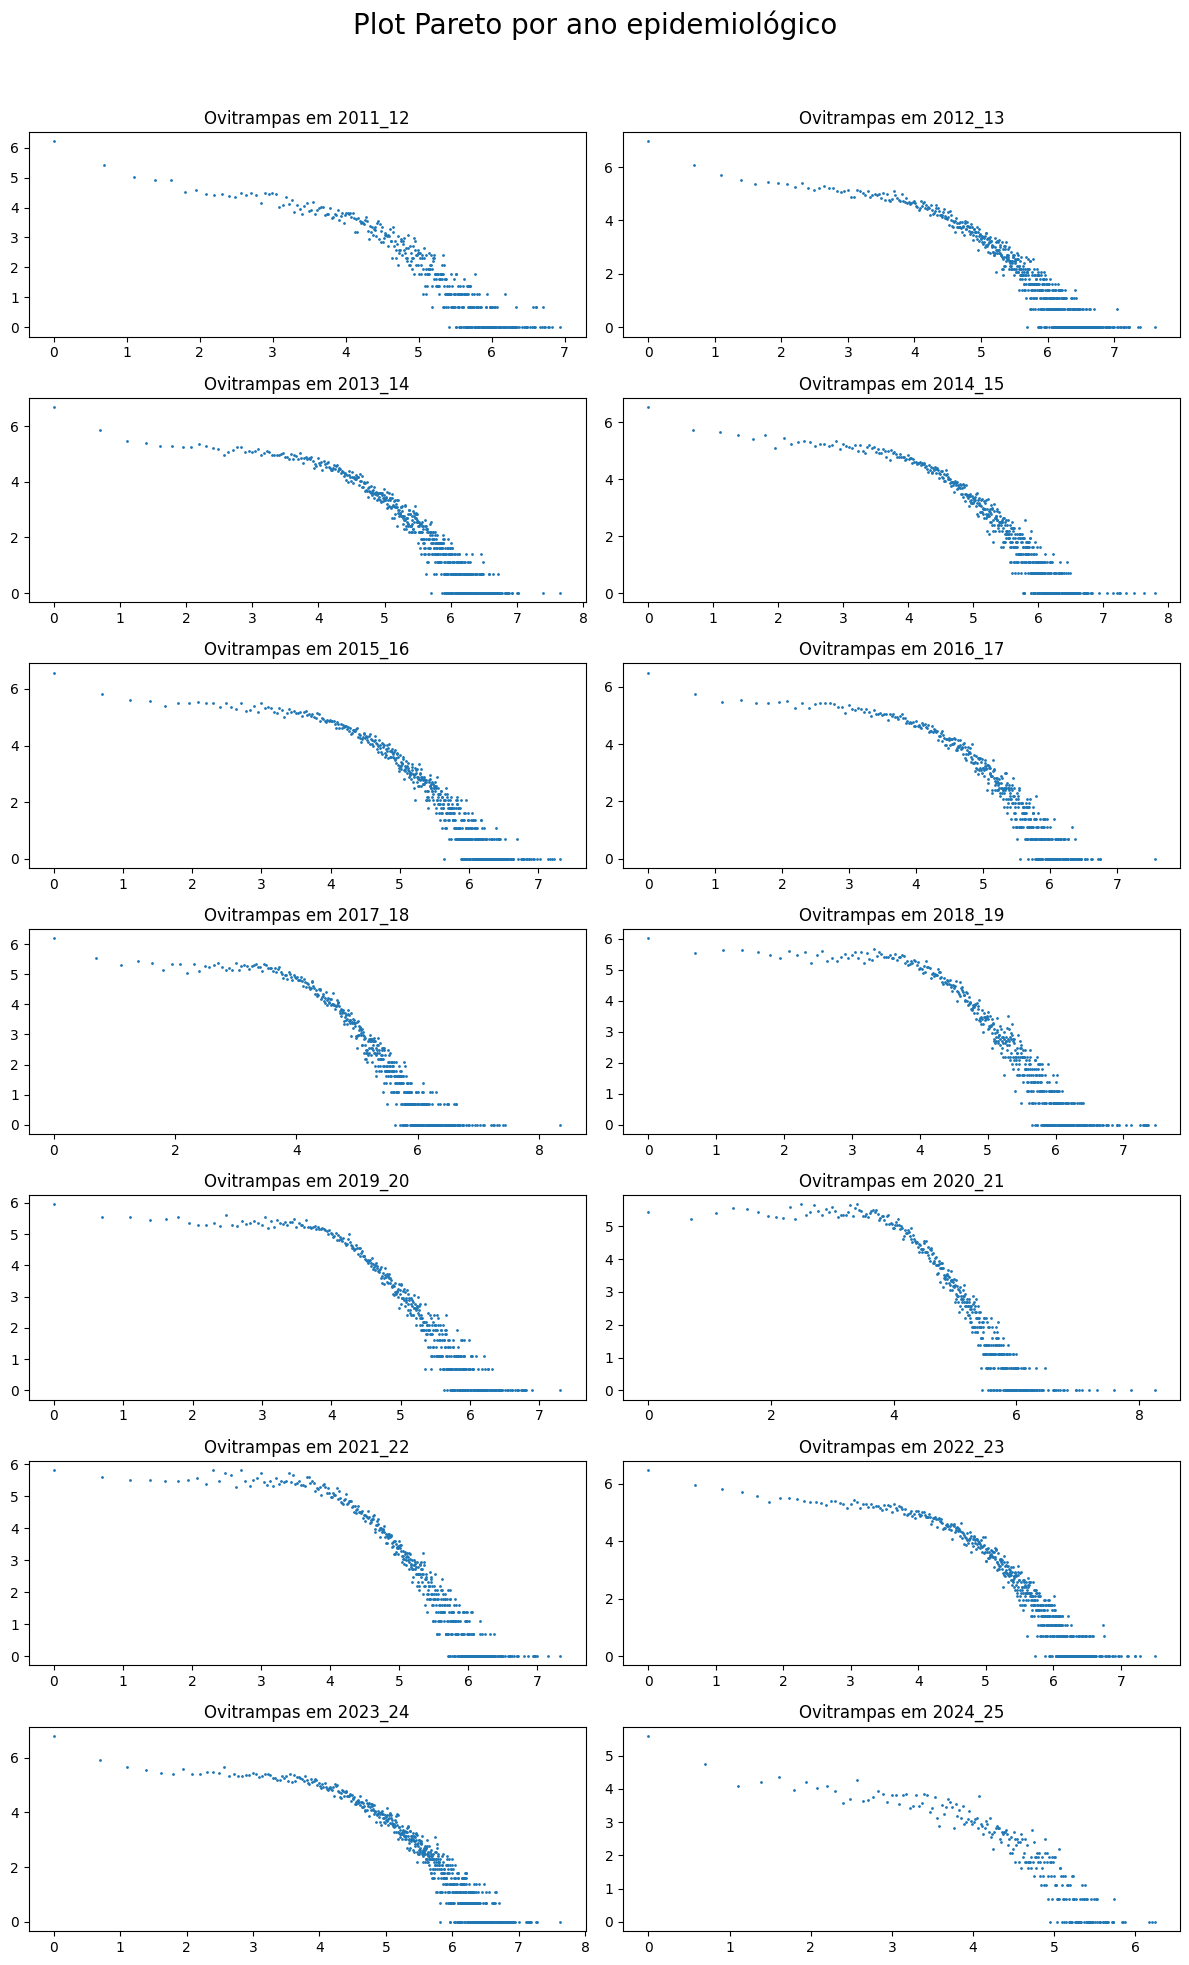

In [24]:
fig, axs = plt.subplots(nrows = 7, ncols = 2,figsize=(12, 20))    
plt.suptitle('Plot Pareto por ano epidemiológico', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_year['anoepid']:
    j = abs(j-1) # 0 or 1
    data_year = data[data['anoepid'] == i]
    utils.pareto_plot(data_year['novos'], plt_title = 'Ovitrampas em ' + i, ax = axs[count,j])
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Category

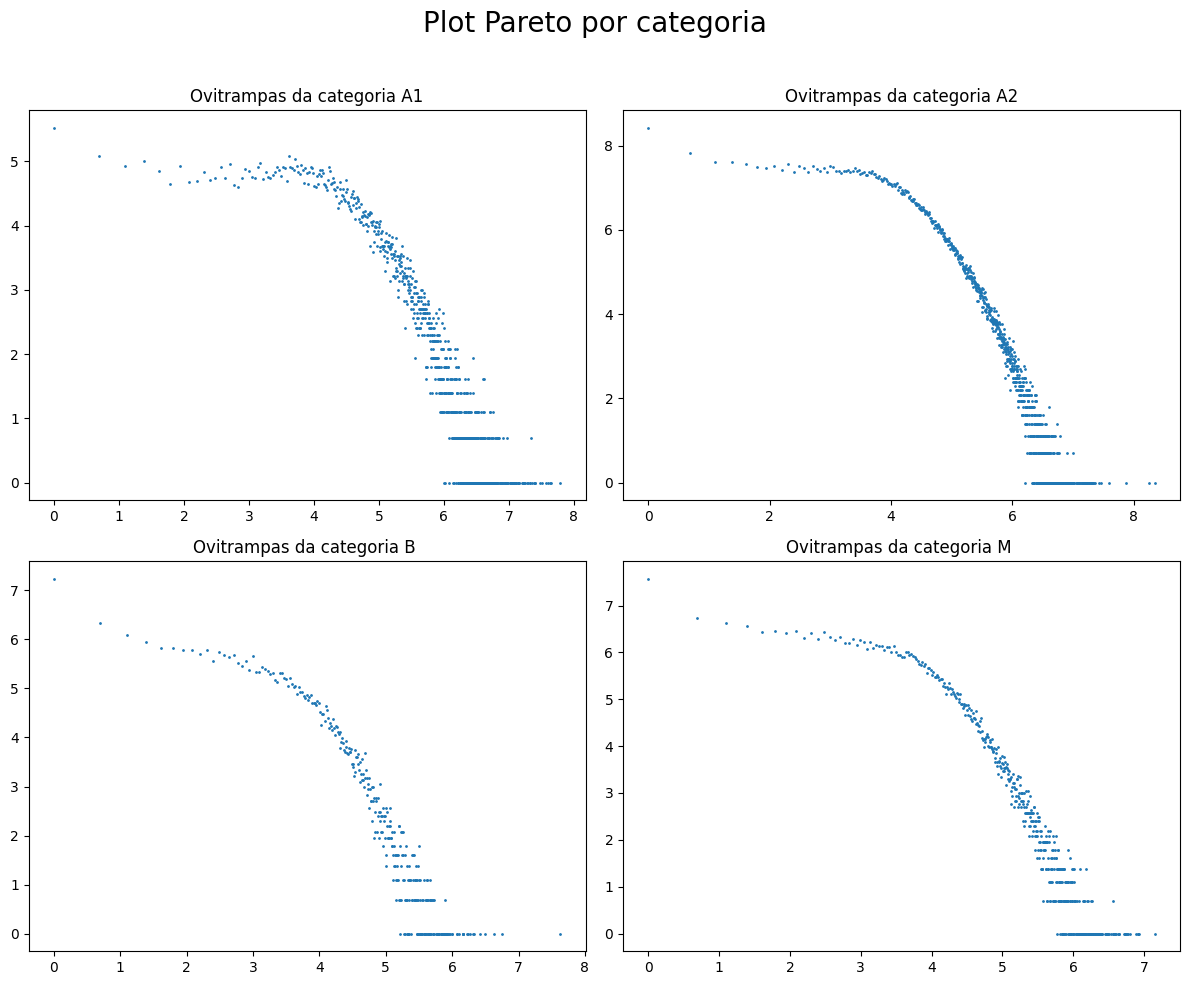

In [25]:
fig,axs = plt.subplots(nrows = 2, ncols = 2,figsize=(12, 10))    
plt.suptitle('Plot Pareto por categoria', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_cat['GerCat']:
    j = abs(j-1) # 0 or 1
    data_cat = data[data['GerCat'] == i]
    utils.pareto_plot(data_cat['novos'], plt_title = 'Ovitrampas da categoria ' + i, ax = axs[count,j])
    axs[count,j].set_title('Ovitrampas da categoria ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Region

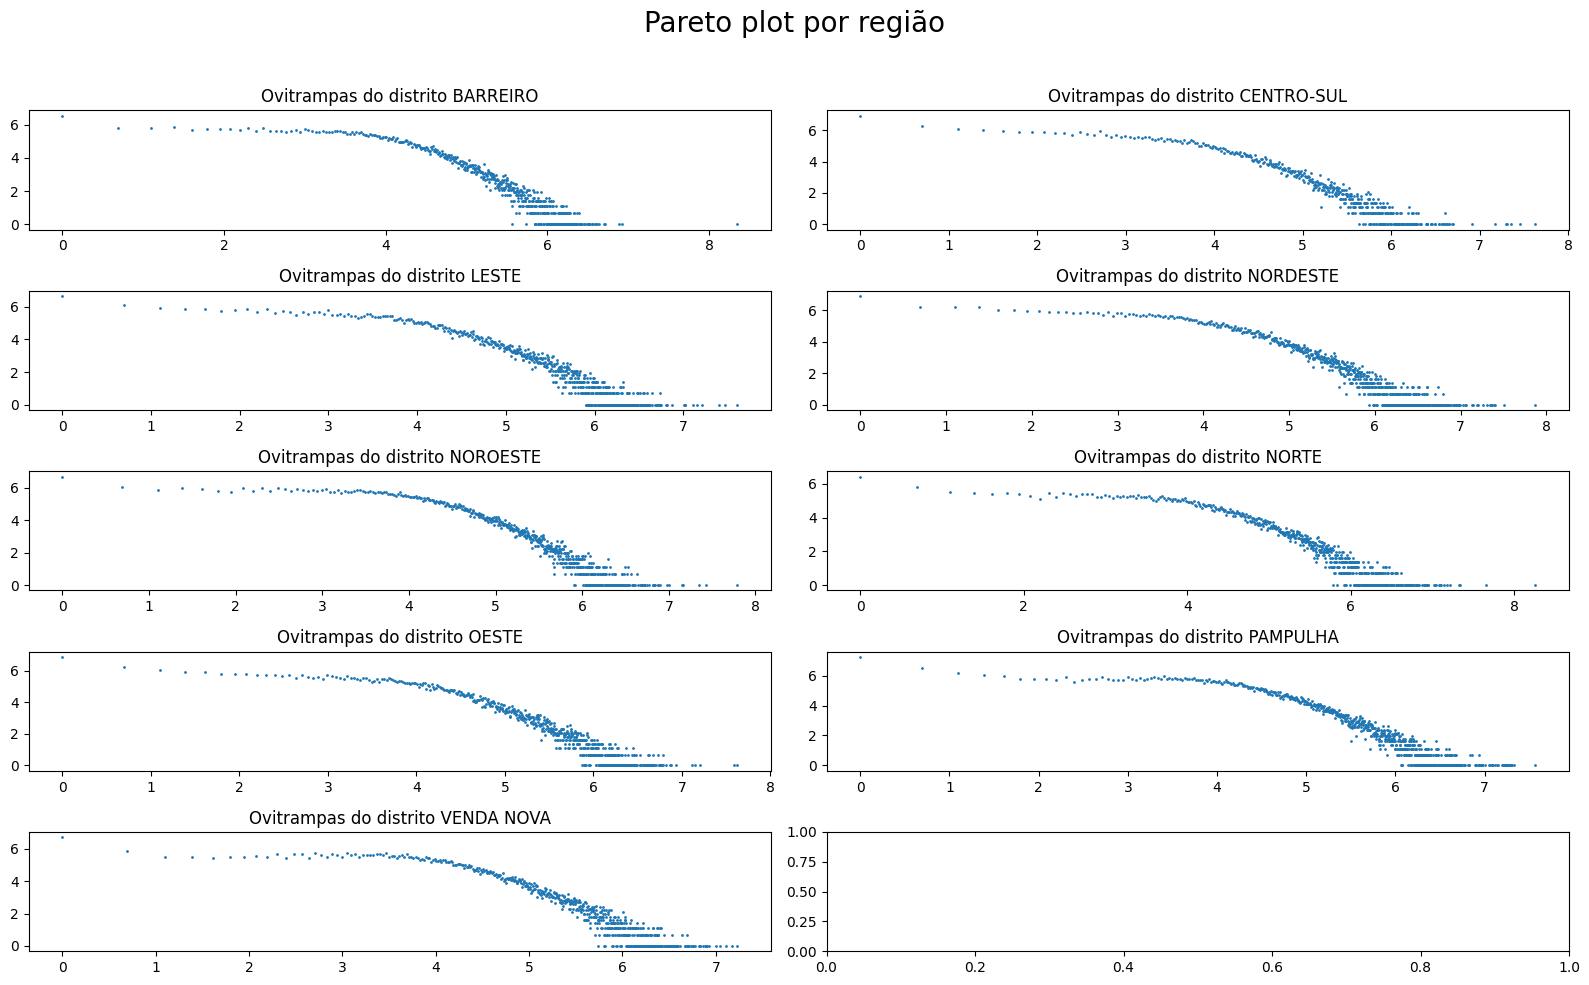

In [26]:
fig,axs = plt.subplots(nrows = 5, ncols = 2,figsize=(16, 10))    
plt.suptitle('Pareto plot por região', fontsize=20)

j = 1 #plot index
count = 0
for i in trap_by_reg['distrito']:
    j = abs(j-1) # 0 or 1    
    data_cat = data[data['distrito'] == i]
    utils.pareto_plot(data_cat['novos'], plt_title = 'Ovitrampas do distrito ' + i, ax = axs[count,j])
    axs[count,j].set_title('Ovitrampas do distrito ' + i)
    count += j

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Maps

In [27]:
map_df = data[['narmad','coordx','coordy','GerCat','coordx2','coordy2','latitude','longitude']]
map_df = map_df.drop_duplicates().reset_index(drop=True)
map_df = map_df.merge(data['narmad'].value_counts().reset_index(),on='narmad',how='left') # count number of traps
map_df = map_df.merge(data.groupby('narmad')['novos'].sum().reset_index() ,on='narmad',how='left') # count number of eggs
map_df = map_df.merge(data.groupby('narmad')['novos'].mean().reset_index().rename(columns={'novos':'mean'}) ,on='narmad',how='left') # count number of eggs

# TODO: treat this better
map_df.where(map_df['longitude'] != 0, inplace=True)
map_df.where(map_df['latitude'] != -19.047717, inplace=True)

map_df_noNaN = map_df.dropna(subset=['latitude','longitude']).reset_index(drop=True)



### Location 

In [28]:
# Create a map centered at the average latitude and longitude
map_center = [map_df_noNaN['latitude'].mean(), map_df_noNaN['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

# Add points to the map
for index, row in map_df_noNaN.iterrows():
    
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=0.1,  # Size of the circle
        color='red',  # Circle color
        fill=True,
        fill_color='red',  # Fill color
        fill_opacity=0.6,  # Fill opacity
    ).add_to(mymap)

title_html = '''<h3 align="center" style="font-size:20px"><b>Mapa por posição</b></h3>'''
mymap.get_root().html.add_child(folium.Element(title_html))
# Save map as HTML
mymap.save("./results/map_traps.html")

### Number of traps

In [122]:
# Create a map centered at the average latitude and longitude
map_center = [map_df_noNaN['latitude'].mean(), map_df_noNaN['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

# Add points to the map
for index, row in map_df_noNaN.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['count']/50,  # Size of the circle
        color= 'red',  # Circle color
        fill=True,
        fill_color='red',  # Fill color
        fill_opacity=0.6,  # Fill opacity
        tooltip=f"Category: {row['GerCat']}, Value: {row['count']}"
    ).add_to(mymap)

title_html = '''<h3 align="center" style="font-size:20px"><b>Mapa por contagem de amostras</b></h3>'''
mymap.get_root().html.add_child(folium.Element(title_html))

# Save map as HTML
mymap.save("./results/map_points.html")

### Categories

In [31]:
# Create a map centered at the average latitude and longitude
map_center = [map_df_noNaN['latitude'].mean(), map_df_noNaN['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

color_mapping = {
    'A2': 'yellow',
    'M ': 'blue',
    'A1': 'red',
    'B ': 'purple'

    # Add more categories and colors as needed
}

create_hist = False
create_pareto = False

# Add points to the map
for index, row in map_df_noNaN.iterrows():

    if create_hist:
        address_hist = utils.hist_html(data.where(data['narmad']==row['narmad'])['novos'], row['narmad'])
    else:
        address_hist =  f"./histograms/histogram_{row['narmad']}.png"
    if create_pareto:
        address_pareto = utils.pareto_plot_html(data.where(data['narmad']==row['narmad'])['novos'], row['narmad'])
    else:
        address_pareto =  f"./pareto_plot/pareto_plot_{row['narmad']}.png"
    tooltip_html = f'''<div>
                        Categoria: {row['GerCat']}<br> Soma: {row['novos']}<br> Média: {row['mean']:.2f}<br>
                         <img src={address_hist} width="250" height="250">
                         <img src={address_pareto} width="250" height="250">
                    </div>
                    '''


    color = color_mapping.get(row['GerCat'], 'black')  # Default color if category not found
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['novos']/1100,  # Size of the circle
        color=color,  # Circle color
        fill=True,
        fill_color=color,  # Fill color
        fill_opacity=0.6,  # Fill opacity
        tooltip= tooltip_html
    ).add_to(mymap)





# Create a legend
legend_html = '''
<div style="position: fixed; 
             bottom: 50px; left: 50px; width: 150px; height: auto; 
             background-color: white; opacity: 0.8; z-index:9999;
             border:2px solid grey; padding: 10px;">
&nbsp;<b>Legend</b><br>
&nbsp;<i style="background: red; border:2px solid red; width: 12px; height: 12px; display:inline-block;"></i> Category A1<br>
&nbsp;<i style="background: yellow; border:2px solid yellow; width: 12px; height: 12px; display:inline-block;"></i> Category A2<br>
&nbsp;<i style="background: blue; border:2px solid blue; width: 12px; height: 12px; display:inline-block;"></i> Category M<br>
&nbsp;<i style="background: purple; border:2px solid purple; width: 12px; height: 12px; display:inline-block;"></i> Category B<br>
</div>
'''
# Add the legend to the map
mymap.get_root().html.add_child(folium.Element(legend_html))

title_html = '''<h3 align="center" style="font-size:20px"><b>Mapa por categoria</b></h3>'''
mymap.get_root().html.add_child(folium.Element(title_html))


# Save map as HTML
mymap.save("./results/map_cat.html")
utils.play_ending_song()
utils.stop_ending_song(10)


### GIF

In [ ]:
images = []

for year in data['anoepid'].unique():

    # Create a map centered at the average latitude and longitude
    map_center = [map_df_noNaN['latitude'].mean(), map_df_noNaN['longitude'].mean()]
    mymap = folium.Map(location=map_center, zoom_start=11)

    # Add points to the map
    for armad in utils.row_with_value(data,'anoepid', year)['narmad'].unique():
        try:
            row = utils.row_with_value(map_df_noNaN,'narmad', armad)
            folium.CircleMarker(
                location=(row['latitude'], row['longitude']),
                radius=0.1,  # Size of the circle
                color='red',  # Circle color
                fill=True,
                fill_color='red',  # Fill color
                fill_opacity=0.6,  # Fill opacity
            ).add_to(mymap)
        except:
            continue
    title_html = f'''<h3 align="center" style="font-size:20px"><b>Mapa por posição - Ano epidemiológico {year}</b></h3>'''
    mymap.get_root().html.add_child(folium.Element(title_html))
    #Save map as HTML
    
    path = f"./results/gif/map_traps_{year}.html"
    mymap.save(path)
    



    



c:\Users\UFMG\Periodos\Periodo_XIV\TCC\Projeto\Códigos\tcc_ovitraps\venv_ovitraps\Lib\site-packages\folium\utilities.py:94: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
c:\Users\UFMG\Periodos\Periodo_XIV\TCC\Projeto\Códigos\tcc_ovitraps\venv_ovitraps\Lib\site-packages\folium\utilities.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
c:\Users\UFMG\Periodos\Periodo_XIV\TCC\Projeto\Códigos\tcc_ovitraps\venv_ovitraps\Lib\site-packages\folium\utilities.py:102: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]
c:\Users\UFMG\Periodos\Periodo_XIV\TCC\Projeto\Códigos\tcc_ovitraps\venv_ovitraps\Lib\site-packages\folium\utilitie

In [37]:
from pathlib import Path
from selenium import webdriver

def convert_html_to_image(html_path):
    # Convert the local path to a file URL
    html_file_url = Path(html_path).resolve().as_uri()

    # Set up Selenium WebDriver (Chrome in this case)
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')  # Run Chrome in headless mode
    options.add_argument('--disable-gpu')  # Disable GPU acceleration
    options.add_argument('--window-size=1200x800')  # Set window size for screenshot

    driver = webdriver.Chrome(options=options)

    # Open the HTML file using the file URL
    driver.get(html_file_url)

    # Take a screenshot and save it as an image
    image_path = html_path.replace('.html', '.png')
    driver.save_screenshot(image_path)

    # Close the driver
    driver.quit()

    return image_path


In [41]:
import os
import imageio
images = [] 
for dirpath, _, filenames in os.walk('./results/gif/', topdown=True):
    for file in filenames:
        path = os.path.join('./results/gif', file)
        path = convert_html_to_image(path)
        images.append(imageio.imread(path))

C:\Users\User\AppData\Local\Temp\ipykernel_4144\1423377795.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(path))


In [49]:
imageio.mimsave('./results/map.gif', images, fps = 1)  # 1 second per frame
